In [2]:
%%time
import dask.dataframe as dd
import numpy as np
import gc

book = dd.read_parquet('/kaggle/input/hw1parquets/book.parquet')
ticker = dd.read_csv('/kaggle/input/hw1parquets/ticker.csv/ticker.csv')
target = dd.read_parquet('/kaggle/input/hw1parquets/target.parquet')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CPU times: user 593 ms, sys: 402 ms, total: 995 ms
Wall time: 1.14 s


In [3]:
ticker = ticker.drop(columns=['seq']).compute()
gc.collect()

224

In [4]:
book = book.drop(columns=['exchange', 'symbol']).compute()
gc.collect()

0

In [5]:
ask_vols = [f'asks[{i}].amount' for i in range(25)]
bid_vols = [f'bids[{i}].amount'for i in range(25)]

ask_vols5 = [f'asks[{i}].amount' for i in range(5)]
bid_vols5 = [f'bids[{i}].amount'for i in range(5)]

**Volume-Synchronized Probability of Informed Trading**

In [6]:
# book['wap'] = calc_wap(book).astype('float32')
# book['log_return'] = log_return(book['wap']).astype('float32')
book['dt'] = dd.to_datetime(book['timestamp'])
book.set_index('dt', inplace=True)
book.sort_index(inplace=True)

In [7]:
book['VPIN'] = 0.0

for i in range(25):
    book['VPIN'] += np.abs(book[ask_vols[i]] - book[bid_vols[i]])
    
book['VPIN']  /= (book[ask_vols].sum(axis=1) + book[bid_vols].sum(axis=1))

In [8]:
for i in range(6):
    book[f'askfreq{i}'] = 100 * book[ask_vols[i]].diff() / book['timestamp'].diff()
    book[f'bidfreq{i}'] = 100 * book[bid_vols[i]].diff() / book['timestamp'].diff()
    
T = '250ms' 
for i in range(6):
    book[f'askfreqT{i}'] = 100 * book[ask_vols[i]].diff().rolling(T).sum() / book['timestamp'].diff().rolling(T).sum()
    book[f'bidfreqT{i}'] = 100 * book[bid_vols[i]].diff().rolling(T).sum() / book['timestamp'].diff().rolling(T).sum()
    
for i in range(6):
    book[f'askRelIntensity{i}'] = (book[f'askfreq{i}'] > book[f'askfreqT{i}']).astype('int8')
    book[f'bidRelIntensity{i}'] = (book[f'bidfreq{i}'] > book[f'bidfreqT{i}']).astype('int8')


In [9]:
book = book.drop(columns=book.columns[6:102])

In [10]:
gc.collect()

0

In [11]:
book.head(1000).tail()

,timestamp,local_timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,VPIN,askfreq0,bidfreq0,askfreq1,...,askRelIntensity1,bidRelIntensity1,askRelIntensity2,bidRelIntensity2,askRelIntensity3,bidRelIntensity3,askRelIntensity4,bidRelIntensity4,askRelIntensity5,bidRelIntensity5
dt,,,,,,,,,,,,,,,,,,,,,
2023-03-22 00:00:45.633,1679443245633000000,1679443245637850368,28092.800781,1.484,28092.699219,15.661,0.789699,-5.033334e-06,0.000000e+00,0.000003,...,1,1,0,0,0,1,1,0,0,0
2023-03-22 00:00:45.666,1679443245666000000,1679443245670875136,28092.800781,1.271,28092.699219,15.643,0.842090,-6.454543e-07,-5.454728e-08,0.000000,...,0,1,1,0,1,0,0,0,1,0
2023-03-22 00:00:45.699,1679443245699000000,1679443245702294016,28092.800781,0.207,28092.699219,13.397,0.950961,-3.224242e-06,-6.806058e-06,0.000000,...,0,1,1,0,1,1,0,0,1,0
2023-03-22 00:00:45.733,1679443245733000000,1679443245737744896,28092.800781,0.207,28092.699219,13.879,0.930267,0.000000e+00,1.417645e-06,0.000000,...,0,0,1,1,1,0,0,0,1,0
2023-03-22 00:00:45.765,1679443245765000000,1679443245774514432,28092.800781,0.231,28092.699219,13.877,0.942403,7.500001e-08,-6.249547e-09,0.000000,...,0,1,1,0,1,0,0,0,1,0


In [12]:
book.drop(columns=['local_timestamp', 'asks[0].price', 'asks[0].amount', 'bids[0].price', 'bids[0].amount'], inplace=True)

In [13]:
bcols = ['VPIN', 'askfreq0', 'bidfreq0', 'askfreq1', 'bidfreq1',
       'askfreq2', 'bidfreq2', 'askfreq3', 'bidfreq3', 'askfreq4', 'bidfreq4',
       'askfreq5', 'bidfreq5', 'askfreqT0', 'bidfreqT0', 'askfreqT1',
       'bidfreqT1', 'askfreqT2', 'bidfreqT2', 'askfreqT3', 'bidfreqT3',
       'askfreqT4', 'bidfreqT4', 'askfreqT5', 'bidfreqT5']

book[bcols] = book[bcols].astype('float16') 

In [14]:
# tcs = ticker.columns[3:]
# ticker[tcs] = ticker[tcs].astype('float32')
# gc.collect()

In [15]:
import numpy as np

def calc_wap(df):
    wap = (df['bids[0].price'] * df['asks[0].amount'] + df['asks[0].price'] * df['bids[0].amount'])/(df['bids[0].amount'] + df['asks[0].amount'])
    return wap

def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

In [16]:
ticker['remote_ts2'] = ticker['remote_ts2'] * 1000000

In [17]:
print(book.columns)

Index(['timestamp', 'VPIN', 'askfreq0', 'bidfreq0', 'askfreq1', 'bidfreq1',
       'askfreq2', 'bidfreq2', 'askfreq3', 'bidfreq3', 'askfreq4', 'bidfreq4',
       'askfreq5', 'bidfreq5', 'askfreqT0', 'bidfreqT0', 'askfreqT1',
       'bidfreqT1', 'askfreqT2', 'bidfreqT2', 'askfreqT3', 'bidfreqT3',
       'askfreqT4', 'bidfreqT4', 'askfreqT5', 'bidfreqT5', 'askRelIntensity0',
       'bidRelIntensity0', 'askRelIntensity1', 'bidRelIntensity1',
       'askRelIntensity2', 'bidRelIntensity2', 'askRelIntensity3',
       'bidRelIntensity3', 'askRelIntensity4', 'bidRelIntensity4',
       'askRelIntensity5', 'bidRelIntensity5'],
      dtype='object')


In [18]:
ticker.sort_values('remote_ts2', inplace=True)
ticker = dd.merge_asof(ticker, book, left_on='remote_ts2', right_on='timestamp')
gc.collect()

0

In [19]:
ticker.head(1000).tail()

,local_ts,remote_ts,remote_ts2,bid_price,bid_amount,ask_price,ask_amount,timestamp,VPIN,askfreq0,...,askRelIntensity1,bidRelIntensity1,askRelIntensity2,bidRelIntensity2,askRelIntensity3,bidRelIntensity3,askRelIntensity4,bidRelIntensity4,askRelIntensity5,bidRelIntensity5
995,1679443210844762112,1679443210564,1679443210559000000,28088.8,5.789,28088.9,1.518,1.679443e+18,0.538574,0.000001,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
996,1679443210850166272,1679443210574,1679443210568000000,28088.8,5.833,28088.9,1.518,1.679443e+18,0.718750,-0.000002,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
997,1679443210854326784,1679443210581,1679443210575000000,28088.8,5.877,28088.9,1.518,1.679443e+18,0.718750,-0.000002,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
998,1679443210859440384,1679443210585,1679443210580000000,28088.8,5.833,28088.9,1.518,1.679443e+18,0.718750,-0.000002,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
999,1679443210859949568,1679443210586,1679443210581000000,28088.8,5.833,28088.9,1.501,1.679443e+18,0.718750,-0.000002,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
for i in range(6):
    ticker[f'askRelIntensity{i}'].fillna(0, inplace=True)
    ticker[f'bidRelIntensity{i}'].fillna(0, inplace=True)
#     ticker[f'askRelIntensity{i}'] = ticker[f'askRelIntensity{i}'].replace({np.nan: 0, np.inf: np.finfo('float16').max})
#     ticker[f'bidRelIntensity{i}'] = ticker[f'bidRelIntensity{i}'].replace({np.nan: 0, np.inf: np.finfo('int8').max})
    ticker[f'askRelIntensity{i}'] = ticker[f'askRelIntensity{i}'].astype('int8')
    ticker[f'bidRelIntensity{i}'] = ticker[f'bidRelIntensity{i}'].astype('int8')

In [21]:
ticker.dtypes

local_ts              int64
remote_ts             int64
remote_ts2            int64
bid_price           float64
bid_amount          float64
ask_price           float64
ask_amount          float64
timestamp           float64
VPIN                float16
askfreq0            float16
bidfreq0            float16
askfreq1            float16
bidfreq1            float16
askfreq2            float16
bidfreq2            float16
askfreq3            float16
bidfreq3            float16
askfreq4            float16
bidfreq4            float16
askfreq5            float16
bidfreq5            float16
askfreqT0           float16
bidfreqT0           float16
askfreqT1           float16
bidfreqT1           float16
askfreqT2           float16
bidfreqT2           float16
askfreqT3           float16
bidfreqT3           float16
askfreqT4           float16
bidfreqT4           float16
askfreqT5           float16
bidfreqT5           float16
askRelIntensity0       int8
bidRelIntensity0       int8
askRelIntensity1    

In [22]:
gc.collect()

0

In [23]:
ticker.drop(columns=['local_ts'], inplace=True)

In [24]:
# Мы это пока не делаем
# target = dd.read_parquet('/kaggle/input/hw1parquets/target.parquet')
# target.head()

# # ticker.drop(columns=['local_ts', 'remote_ts'], inplace=True)
# ticker = dd.merge_asof(target, ticker, left_on='local_ts', right_on='remote_ts2')
# gc.collect()

In [25]:
ticker.dtypes

remote_ts             int64
remote_ts2            int64
bid_price           float64
bid_amount          float64
ask_price           float64
ask_amount          float64
timestamp           float64
VPIN                float16
askfreq0            float16
bidfreq0            float16
askfreq1            float16
bidfreq1            float16
askfreq2            float16
bidfreq2            float16
askfreq3            float16
bidfreq3            float16
askfreq4            float16
bidfreq4            float16
askfreq5            float16
bidfreq5            float16
askfreqT0           float16
bidfreqT0           float16
askfreqT1           float16
bidfreqT1           float16
askfreqT2           float16
bidfreqT2           float16
askfreqT3           float16
bidfreqT3           float16
askfreqT4           float16
bidfreqT4           float16
askfreqT5           float16
bidfreqT5           float16
askRelIntensity0       int8
bidRelIntensity0       int8
askRelIntensity1       int8
bidRelIntensity1    

In [26]:
# ticker['target'] = ticker['target'].astype('int8')
ticker['remote_ts'] = 0
ticker['remote_ts'] = ticker['remote_ts'].astype('int8')
ticker['bid_price'] = ticker['bid_price'] .astype('float16')
ticker['bid_amount'] = ticker['bid_amount'].astype('float16')
ticker['ask_price'] = ticker['ask_price'].astype('float16')
ticker['ask_amount'] = ticker['ask_amount'].astype('float16')

In [27]:
gc.collect()

0

In [28]:
ticker.head(100).tail()

,remote_ts,remote_ts2,bid_price,bid_amount,ask_price,ask_amount,timestamp,VPIN,askfreq0,bidfreq0,...,askRelIntensity1,bidRelIntensity1,askRelIntensity2,bidRelIntensity2,askRelIntensity3,bidRelIntensity3,askRelIntensity4,bidRelIntensity4,askRelIntensity5,bidRelIntensity5
95,0,1679443203946000000,28080.0,0.020996,28096.0,0.466064,1.679443e+18,0.97998,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
96,0,1679443203947000000,28080.0,0.016006,28096.0,0.466064,1.679443e+18,0.97998,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
97,0,1679443203947000000,28080.0,0.016006,28096.0,0.700195,1.679443e+18,0.97998,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
98,0,1679443203949000000,28080.0,0.004002,28096.0,0.700195,1.679443e+18,0.97998,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
99,0,1679443203953000000,28080.0,0.004002,28096.0,0.455078,1.679443e+18,0.97998,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


**Realized Variance**

In [29]:
# ticker = ticker.sort_values('local_ts')
# ticker['dt'] = dd.to_datetime(ticker['remote_ts2']*1000000)
ticker['dt'] = dd.to_datetime(ticker['remote_ts2'])

# book['mid_price'] = (book['asks[0].price'] + book['bids[0].price']) / 2
ticker['mid_price'] = (ticker['bid_price'] + ticker['ask_price']) / 2
ticker['log_return'] = log_return(ticker['mid_price']).astype('float32')


ticker = ticker.set_index('dt', inplace=False)
ticker = ticker.sort_index(inplace=False)

# horizons = ['100ms', '200ms', '500ms', '1000ms', '2000ms']
horizons = ['100ms', '250ms', '2500ms']

for h in horizons:
    ticker[f'RV{h}'] = np.sqrt((ticker['log_return'] ** 2).rolling(h).sum()).astype('float16')

In [30]:
ticker['High'] = ticker['mid_price'].rolling(10).max().astype('float16')
ticker['Low'] = ticker['mid_price'].rolling(10).min().astype('float16')

In [31]:
ticker.head(1000).tail()

,remote_ts,remote_ts2,bid_price,bid_amount,ask_price,ask_amount,timestamp,VPIN,askfreq0,bidfreq0,...,bidRelIntensity4,askRelIntensity5,bidRelIntensity5,mid_price,log_return,RV100ms,RV250ms,RV2500ms,High,Low
dt,,,,,,,,,,,,,,,,,,,,,
2023-03-22 00:00:10.559,0,1679443210559000000,28096.0,5.789062,28096.0,1.517578,1.679443e+18,0.538574,0.000001,1.084805e-05,...,1,0,1,28096.0,0.0,0.0,0.0,0.0,28096.0,28096.0
2023-03-22 00:00:10.568,0,1679443210568000000,28096.0,5.832031,28096.0,1.517578,1.679443e+18,0.718750,-0.000002,-7.152557e-07,...,1,1,1,28096.0,0.0,0.0,0.0,0.0,28096.0,28096.0
2023-03-22 00:00:10.575,0,1679443210575000000,28096.0,5.878906,28096.0,1.517578,1.679443e+18,0.718750,-0.000002,-7.152557e-07,...,1,1,1,28096.0,0.0,0.0,0.0,0.0,28096.0,28096.0
2023-03-22 00:00:10.580,0,1679443210580000000,28096.0,5.832031,28096.0,1.517578,1.679443e+18,0.718750,-0.000002,-7.152557e-07,...,1,1,1,28096.0,0.0,0.0,0.0,0.0,28096.0,28096.0
2023-03-22 00:00:10.581,0,1679443210581000000,28096.0,5.832031,28096.0,1.500977,1.679443e+18,0.718750,-0.000002,-7.152557e-07,...,1,1,1,28096.0,0.0,0.0,0.0,0.0,28096.0,28096.0


**Realized semi-variance**

In [32]:
for h in horizons:
    ticker[f'RSVp{h}'] = np.sqrt((ticker['log_return'] ** 2 * (ticker['log_return'] > 0)).rolling(h).sum()).astype('float16')
    ticker[f'RSVn{h}'] = np.sqrt((ticker['log_return'] ** 2 * (ticker['log_return'] < 0)).rolling(h).sum()).astype('float16')

**Realized bipower variation**

In [33]:
for h in horizons:
    ticker[f'BVl1{h}'] = (np.pi / 2) * (np.abs(ticker['log_return']) * np.abs(ticker['log_return'].shift(1))).rolling(h).sum().astype('float16')
#     ticker[f'BVl2{h}'] = (np.pi / 2) * (np.abs(ticker['log_return']) * np.abs(ticker['log_return'].shift(2))).rolling(h).sum().astype('float32')

In [34]:
# tcs = ticker.columns[3:]
# ticker[tcs]=ticker[tcs].astype('float32')
# gc.collect()

**Realized bipower semivariance (+, -)**

In [35]:
for h in horizons:
    ticker[f'BVSVp{h}'] = (np.pi / 2) * ((np.abs(ticker['log_return']) * np.abs(ticker['log_return'].shift(1))) * (ticker['log_return'] > 0)).rolling(h).sum().astype('float16')
    ticker[f'BVSVn{h}'] = (np.pi / 2) * ((np.abs(ticker['log_return']) * np.abs(ticker['log_return'].shift(1))) * (ticker['log_return'] < 0)).rolling(h).sum().astype('float16')

**Jump Variation**

In [36]:
for h in horizons:
    ticker[f'JV{h}'] = np.maximum(ticker[f'RV{h}']-ticker[f'BVl1{h}'], 0).astype('float16')

In [37]:
for h in horizons:
    ticker[f'RV3_{h}'] = np.power((ticker['log_return'] ** 3).rolling(h).sum(), 1/3).astype('float16')

**Realized quarticity**

In [38]:
gc.collect()

106

In [39]:
ticker['RQ'] = ((ticker['log_return'] ** 4).rolling(10).sum() * (10/3)).astype('float16')

**Realized quarticity Tripower**

In [40]:
#  ticker['RQT'] = 3 * np.power(np.abs(ticker['log_return']) * np.abs(ticker['log_return']).shift(1) * np.abs(book['log_return']).shift(2), 4/3)

In [41]:
gc.collect()

0

**High-Low Volatility Estimators**

In [42]:
import pandas as pd
HLVE = np.zeros(len(ticker))
HLVE2 = np.zeros(len(ticker))
HtL = np.log((ticker['High'] / ticker['Low']))
for i in range(10):
    HLVE[i::10] = pd.Series(HtL[i::10]).rolling(10).mean()
    HLVE2[i::10] = pd.Series((HtL**2)[i::10]).rolling(10).mean()
    
ticker['HLVE'] = HLVE.astype('float16')
ticker['HLVE2'] = HLVE2.astype('float16')
del HLVE
del HLVE2
gc.collect()

0

**Corwin and Schultz Volatility estimator**

In [43]:
High2bars = ticker['mid_price'].rolling(20).max()
Low2bars = ticker['mid_price'].rolling(20).min()
gamma = (np.log(High2bars / Low2bars)) ** 2
beta = ((HtL**2).shift(10) + (HtL**2))/ 2

alpha = np.sqrt(beta) * (np.sqrt(2) - 1) / (3 - 2 * np.sqrt(2)) - np.sqrt(gamma / (3 - 2 * np.sqrt(2)))

ticker['CSVE'] = 2 * (np.exp(alpha) - 1) / (1 + np.exp(alpha)).astype('float16')

del High2bars
del Low2bars
del gamma
del beta
del alpha
del HtL

**Alligator indicator**

In [44]:
# AlligatorJaw = np.zeros(len(ticker))
# AlligatorTeeth = np.zeros(len(ticker))
# AlligatorLips = np.zeros(len(ticker))

# AlBase = (ticker['High'] + ticker['Low']) / 2
# for i in range(10):
#     AlligatorJaw[i::10] = AlBase[i::10].rolling(13).mean()
#     AlligatorTeeth[i::10] = AlBase[i::10].rolling(8).mean()
#     AlligatorLips[i::10] = AlBase[i::10].rolling(5).mean()
    
    
    
# # ticker['AlligatorJaw'] = AlligatorJaw.astype('float32')
# # ticker['AlligatorTeeth'] = AlligatorTeeth.astype('float32')
# # ticker['AlligatorLips'] = AlligatorLips.astype('float32')

# # ticker[['AlligatorJaw', 'AlligatorTeeth', 'AlligatorLips']].head(1000).tail()


# del AlligatorJaw
# del AlligatorTeeth
# del AlligatorLips
# gc.collect()

**Absolute price oscillator**

In [45]:
# M = (ticker['High'] + ticker['Low']) / 2
# APO = np.zeros(len(ticker))

# for i in range(10):
#     APO[i::10] = (M[i::10].ewm(5).mean() - M[i::10].ewm(13).mean()).astype('float32')
    
# del M
    
# # ticker['APO'] = APO

# del APO

In [46]:
# Arron indicator

ArronUp = np.zeros(len(ticker))
ArronDown = np.zeros(len(ticker))

for i in range(10):
    High20 = ticker['High'][i::10].rolling(20).max()
    Low20 = ticker['Low'][i::10].rolling(20).min()
    ArronUp[i::10] = 100 * (20 - High20 / 20)
    ArronDown[i::10] = 100 * (20 - Low20 / 20)
    
# ticker['ArronUp'] = ArronUp.astype('float32')
# ticker['ArronDown'] = ArronDown.astype('float32')
ticker['ArronOsc'] = (ArronUp - ArronDown).astype('float16')


del ArronUp
del ArronDown
del High20
del Low20
gc.collect()

0

In [47]:
# #Ichimoku clouds.
# CL = np.zeros(len(ticker))
# BL = np.zeros(len(ticker))
# LSB = np.zeros(len(ticker))
# LS = np.zeros(len(ticker))

# for i in range(10):
#     CL[i::10] = (ticker['High'][i::10].rolling(9).max() + ticker['Low'][i::10].rolling(9).min()) / 2
#     BL[i::10] = ticker['High'][i::10].rolling(26).max() + ticker['Low'][i::10].rolling(26).min()
#     LSB[i::10] = (ticker['High'][i::10].rolling(52).max() + ticker['Low'][i::10].rolling(52).min()) / 2

    
# LSA = (CL + BL) / 2

# # ticker['LSA'] = LSA.astype('float32')
# # ticker['LSB'] = LSB.astype('float32')
# # ticker['ConvLine'] = CL.astype('float32')

# del CL
# del BL
# del LSB
# del LS
# gc.collect()

In [48]:
# #Double exponential moving average
# M = (ticker['High'] + ticker['Low']) / 2
# DEMA = np.zeros(len(ticker))
# for i in range(10):
#     DEMA[i::10] = 2 * M[i::10].ewm(20).mean() - M[i::10].ewm(20).mean().ewm(20).mean()
# # ticker['DEMA'] = DEMA.astype('float32')

# del DEMA
# del M
# gc.collect()

In [49]:
gc.collect()

0

In [50]:
# # Detrended price oscillator
# DPO = np.zeros(len(ticker))
# for i in range(10):
#     DPO[i::10] = (ticker['High'][i::10].rolling(10).max()/12) - ticker[i::10]['mid_price'].rolling(10).mean()
# # ticker['DPO'] = DPO.astype('float32')
# del DPO
# gc.collect()

In [51]:
# Buy \ Sell fractals

HH5 = np.zeros(len(ticker))
for i in range(10):
    HH5[i::10] = ticker['High'][i::10].rolling(5).max()
    
ticker['BuyFractal'] = (
    (ticker['High'].shift(20) == HH5) & 
    (ticker['High'].shift(30) < HH5) & 
    (ticker['High'].shift(40) < HH5) & 
    (ticker['High'].shift(10) < HH5) & 
    (ticker['High'] < HH5)).astype('int8')


LL5 = np.zeros(len(ticker))
for i in range(10):
    LL5[i::10] = ticker['Low'][i::10].rolling(5).min()
    
ticker['SellFractal'] = (
    (ticker['Low'].shift(20) == LL5) 
    & (ticker['Low'].shift(30) < LL5) 
    & (ticker['Low'].shift(40) < LL5)
    & (ticker['Low'].shift(10) < LL5)
    & (ticker['Low'] < LL5)).astype('int8')

del HH5
del LL5
gc.collect()

0

In [52]:
ticker.columns

Index(['remote_ts', 'remote_ts2', 'bid_price', 'bid_amount', 'ask_price',
       'ask_amount', 'timestamp', 'VPIN', 'askfreq0', 'bidfreq0', 'askfreq1',
       'bidfreq1', 'askfreq2', 'bidfreq2', 'askfreq3', 'bidfreq3', 'askfreq4',
       'bidfreq4', 'askfreq5', 'bidfreq5', 'askfreqT0', 'bidfreqT0',
       'askfreqT1', 'bidfreqT1', 'askfreqT2', 'bidfreqT2', 'askfreqT3',
       'bidfreqT3', 'askfreqT4', 'bidfreqT4', 'askfreqT5', 'bidfreqT5',
       'askRelIntensity0', 'bidRelIntensity0', 'askRelIntensity1',
       'bidRelIntensity1', 'askRelIntensity2', 'bidRelIntensity2',
       'askRelIntensity3', 'bidRelIntensity3', 'askRelIntensity4',
       'bidRelIntensity4', 'askRelIntensity5', 'bidRelIntensity5', 'mid_price',
       'log_return', 'RV100ms', 'RV250ms', 'RV2500ms', 'High', 'Low',
       'RSVp100ms', 'RSVn100ms', 'RSVp250ms', 'RSVn250ms', 'RSVp2500ms',
       'RSVn2500ms', 'BVl1100ms', 'BVl1250ms', 'BVl12500ms', 'BVSVp100ms',
       'BVSVn100ms', 'BVSVp250ms', 'BVSVn250ms', 'BVSVp25

In [53]:
ticker.drop(columns=['remote_ts','bid_price', 'bid_amount', 'ask_price',
       'ask_amount', 'timestamp'], inplace=True)

In [54]:
gc.collect()

0

In [55]:
ticker.dtypes

remote_ts2       int64
VPIN           float16
askfreq0       float16
bidfreq0       float16
askfreq1       float16
                ...   
HLVE2          float16
CSVE           float64
ArronOsc       float16
BuyFractal        int8
SellFractal       int8
Length: 73, dtype: object

In [58]:
ticker.reset_index(inplace=True)

In [59]:
ticker.to_feather('extraFeatures.feather')

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# calculate correlation matrix
corr_matrix = ticker.sample(n=1000000)[ticker.columns[9:]].drop(columns=['High', 'Low', ]).corr()

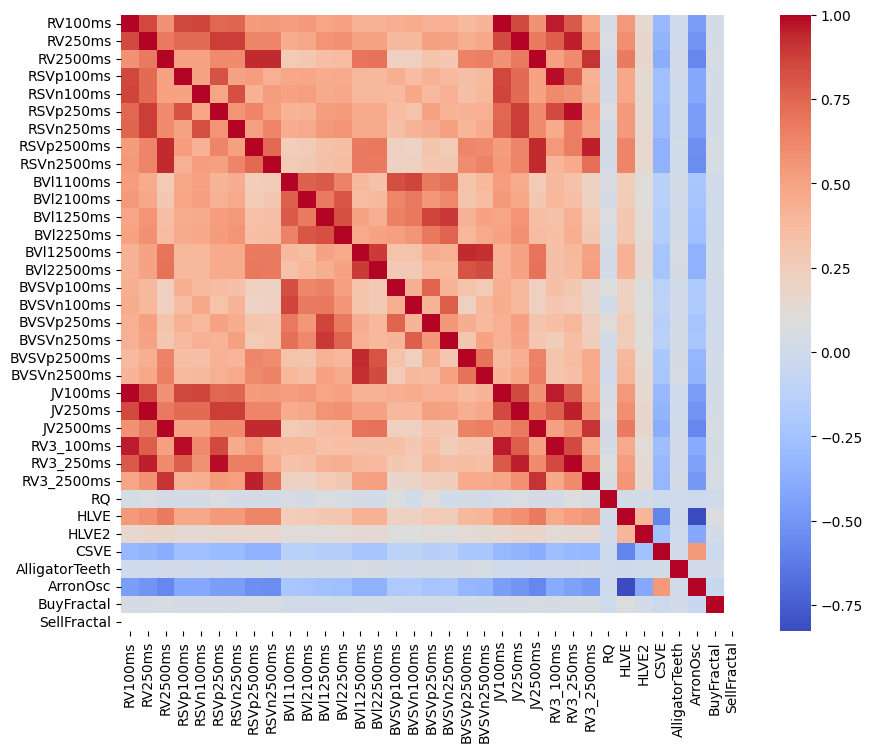

In [43]:
# plot heatmap of correlation matrixбл
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# show plot
plt.show()

In [1]:
ticker.dtypes

NameError: name 'ticker' is not defined

In [40]:
ticker.to_parquet('ExtraFeatures.parquet')

In [41]:
tcs2 = ticker.columns[3:-2]
for col in tcs2:
    ticker[col] = ticker[col].astype('float16')

In [42]:
gc.collect()

0

,local_ts,target
0,1679443200002269696,0
1,1679443200023076352,0
2,1679443200025819392,0
3,1679443200041581312,0
4,1679443200045155072,0


In [44]:
ticker.head()
1679443200002269696
1679443199993000000

1679443199993000000

In [47]:
gc.collect()

23787

In [48]:
ticker.drop(columns=['bid_price','bid_amount','ask_price','ask_amount','mid_price','log_return'], inplace=True)

0

In [ ]:
final.compute()

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
# calculate correlation matrix
corr_matrix = final.sample(n=1000000).corr()

# plot heatmap of correlation matrixбл
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# show plot
plt.show()

ValueError: sample does not support the number of sampled items parameter, 'n'. Please use the 'frac' parameter instead.

In [ ]:
ticker.reset_index(inplace=True)
ticker.sort_values('remote_ts2', inplace=True)

In [ ]:
final.head()

In [ ]:
del target
del ticker
gc.collect()

In [9]:
trades = dd.read_parquet('/kaggle/input/hw1parquets/trades.parquet')
import seaborn as sns

/tmp/ipykernel_35/3089463133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trades['amount'][trades['amount'] <= 0.1], bins=100)


<AxesSubplot: xlabel='amount', ylabel='Density'>

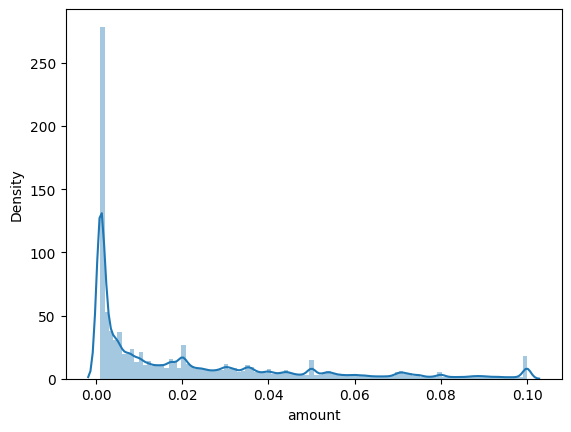

In [12]:
sns.distplot(trades['amount'][trades['amount'] <= 0.1], bins=100)

/tmp/ipykernel_35/853104886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trades['amount'][trades['amount'] <= 0.05], bins=100)


<AxesSubplot: xlabel='amount', ylabel='Density'>

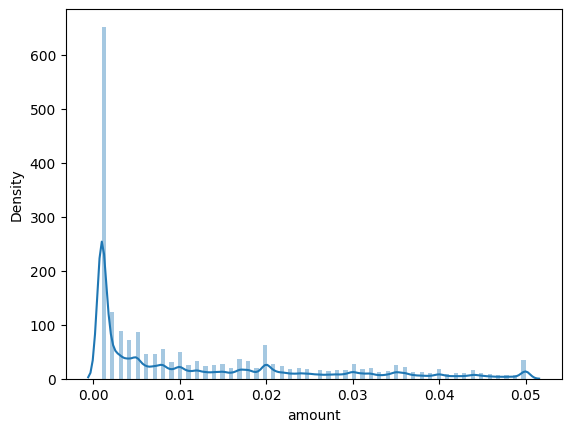

In [14]:
sns.distplot(trades['amount'][trades['amount'] <= 0.05], bins=100)

/tmp/ipykernel_35/3943780714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trades['amount'][trades['amount'] <= 0.02], bins=100)


<AxesSubplot: xlabel='amount', ylabel='Density'>

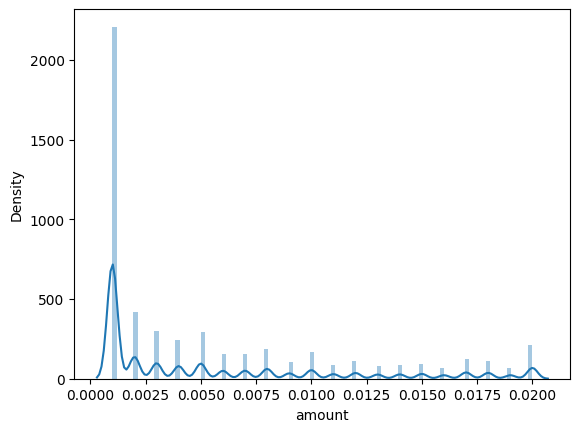

In [15]:
sns.distplot(trades['amount'][trades['amount'] <= 0.02], bins=100)

/tmp/ipykernel_35/650467063.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trades['GUItrade'])


<AxesSubplot: xlabel='GUItrade', ylabel='Density'>

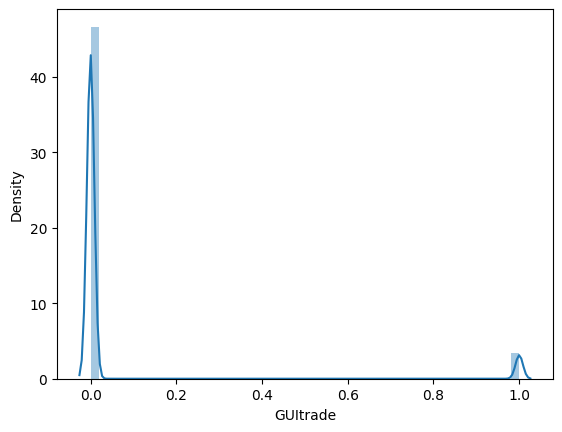

In [18]:
trades['GUItrade'] = (trades['amount'].isin([0.50, 0.20, 0.10, 0.05,0.02, 0.01]))
sns.distplot(trades['GUItrade'])

In [19]:
gc.collect()

503

In [20]:
for h in horizons:
    std = ticker['log_return'].rolling(h).std()
    mean = ticker['log_return'].rolling(h).mean()
    ticker[f'varc{h}'] = std / (mean + 1e-3)

In [21]:
# Realized bipower variation
for h in horizons:
    ticker[f'RBV{h}'] = (ticker['log_return'].abs() *  ticker['log_return'].shift(1).abs()).rolling(h).sum()

In [22]:
# Jumping
for h in horizons[:2]:
    rv = (ticker['log_return']**2).rolling(h).sum()
    bv = ticker['log_return'].abs().rolling(h).sum()
    ticker[f'isJump{h}'] = np.maximum(rv-bv, 0)

In [23]:
# Realized Semivariance
ticker['RSVm'] = (ticker['log_return'] < 0) * (ticker['log_return']**2)
ticker['RSVp'] = (ticker['log_return'] > 0) * (ticker['log_return']**2)

In [24]:
gc.collect()

0

In [25]:
# Signed jump variation
sjv = ticker['RSVp'] - ticker['RSVm']
ticker['SJVp'] = sjv * (sjv > 0)
ticker['SJVm'] = sjv * (sjv < 0)

In [26]:
# Realized Skewness and Kurtosis
for h in horizons:
    ticker[f'RSkew{h}'] = (ticker['log_return']**3).rolling(h).sum()
    ticker[f'Kurtisis{h}'] = (ticker['log_return']**4).rolling(h).sum()

In [27]:
for h in horizons:
    ticker[f'realized1{h}'] = np.sqrt((ticker['log_return'] ** 4).rolling(h).sum() / (6 * (ticker['log_return'] ** 2).rolling(h).sum()))
#     book[f'realized2{h}']

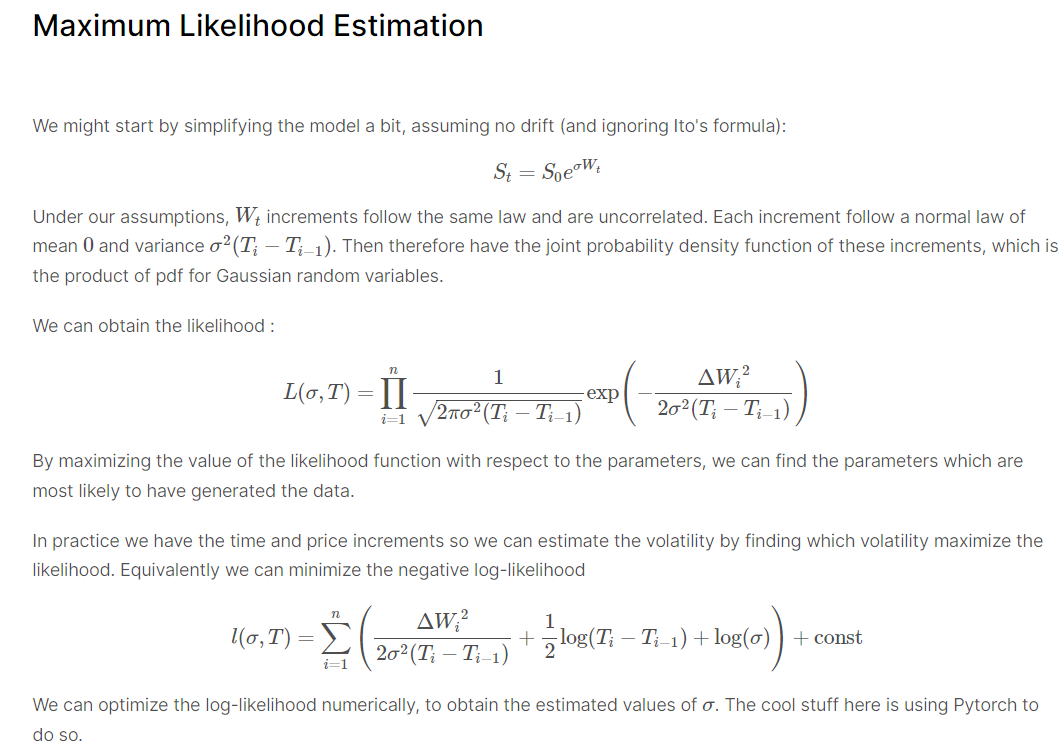

## Caveats:
This approach assume a lot things (normal increments of log returns, no drift, independence of increments). We know these assumptions are all wrong, but the volatility estimation might still be usefull.

In [29]:
for i, c in enumerate(book.columns):
    print(i, c) 

0 timestamp
1 local_timestamp
2 asks[0].price
3 asks[0].amount
4 bids[0].price
5 bids[0].amount
6 wap
7 log_return
8 RV100ms
9 RV200ms
10 RV500ms
11 RV1000ms
12 RV2000ms
13 RV3_100ms
14 RV3_200ms
15 RV3_500ms
16 RV3_1000ms
17 RV3_2000ms
18 varc100ms
19 varc200ms
20 varc500ms
21 varc1000ms
22 varc2000ms
23 RBV100ms
24 RBV200ms
25 RBV500ms
26 RBV1000ms
27 RBV2000ms
28 isJump100ms
29 isJump200ms
30 RSVm
31 RSVp
32 SJVp
33 SJVm
34 RSkew100ms
35 Kurtisis100ms
36 RSkew200ms
37 Kurtisis200ms
38 RSkew500ms
39 Kurtisis500ms
40 RSkew1000ms
41 Kurtisis1000ms
42 RSkew2000ms
43 Kurtisis2000ms
44 realized1100ms
45 realized1200ms
46 realized1500ms
47 realized11000ms
48 realized12000ms


In [ ]:
ticker['Open'] = ticker['mid_price'].shift(10)

def upper_shadow(df):
    return df['High'] - np.maximum(df['Close'], df['Open'])

def lower_shadow(df):
    return np.minimum(df['Close'], df['Open']) - df['Low']

# ma_horizons = ['100ms', '250ms', '500ms', '1000ms', '2500ms', '5000ms', '10000ms']
ma_horizons = [5, 20, 50, 200, 500, 1000]

sma_cols = [f'SMA{mah}' for mah in ma_horizons]
ema_cols = [f'EMA{mah}' for mah in ma_horizons]

for mah in ma_horizons:
    ticker[f'SMA{mah}'] = ticker['wap'].rolling(mah).mean()
    ticker[f'EMA{mah}'] = ticker.wap.ewm(span=mah, adjust=False).mean()
    
    #EMA and SMA comparison:
    ticker[f'MAC{h}'] = ticker[f'EMA{mah}'] > ticker['SMA{mah}']

# Count how many MA's are below or above the current price:

ticker['MAp'] = 0
for mah in horizons:
    ticker['MAp'] += (ticker[f'SMA{mah}'] > ticker['wap'])
    ticker['MAp'] += (ticker[f'EMA{mah}'] > ticker['wap'])
    
# gap between max and min MA

ticker['SMAg'] = ticker[sma_cols].max(axis=1) - ticker[sma_cols].min(axis=1)
ticker['EMAg'] = ticker[ema_cols].max(axis=1) - ticker[ema_cols].min(axis=1)
    

ticker['average'] = (ticker['High'] + ticker['Low'] + ticker['Close'])/3
ticker['vwap'] = (ticker['average'] * ticker['amount'])
ticker['vwap_pct_ret'] = ticker['vwap'].pct_change()
ticker['close_pct_ret'] = ticker['Close'].pct_change()
# ticker = ticker.sort_values(by = "Date", ascending = False).reset_index(drop = True)
ticker['pvwap'] = ticker['vwap_pct_ret'].shift(-1)

Merge ticker features with book features with target. 